In [9]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Automatically get the correct uploaded file name
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"✅ Dataset '{filename}' loaded successfully!")
df.head()


Saving heart.csv to heart (3).csv
✅ Dataset 'heart (3).csv' loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# ====================================================
# 🔍 2. Prepare Data
# ====================================================
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


🌳 Decision Tree Test Accuracy: 0.7805


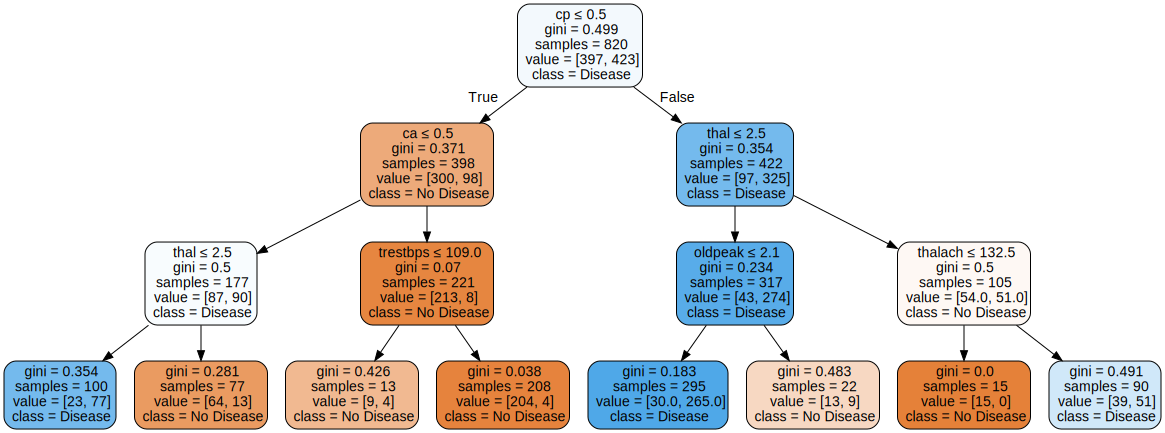

In [11]:
# ====================================================
# 🌳 3. Train Decision Tree Classifier and Visualize
# ====================================================
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
print(f"🌳 Decision Tree Test Accuracy: {tree_acc:.4f}")

# Visualize the tree
dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

graphviz.Source(dot_data)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


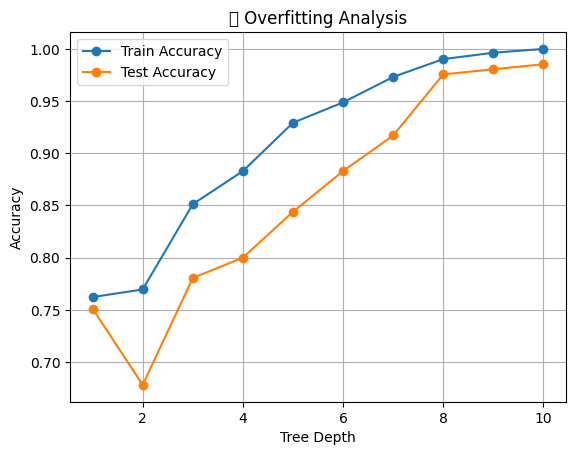

In [12]:
# ====================================================
# 📊 4. Analyze Overfitting by Varying Depth
# ====================================================
import matplotlib.pyplot as plt

depths = range(1, 11)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_scores, label='Test Accuracy', marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("🌳 Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# ====================================================
# 🌲 5. Train Random Forest and Compare Accuracy
# ====================================================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"🌲 Random Forest Test Accuracy: {rf_acc:.4f}")


🌲 Random Forest Test Accuracy: 0.8732


<ipython-input-14-97a4ebf8369b>:12: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


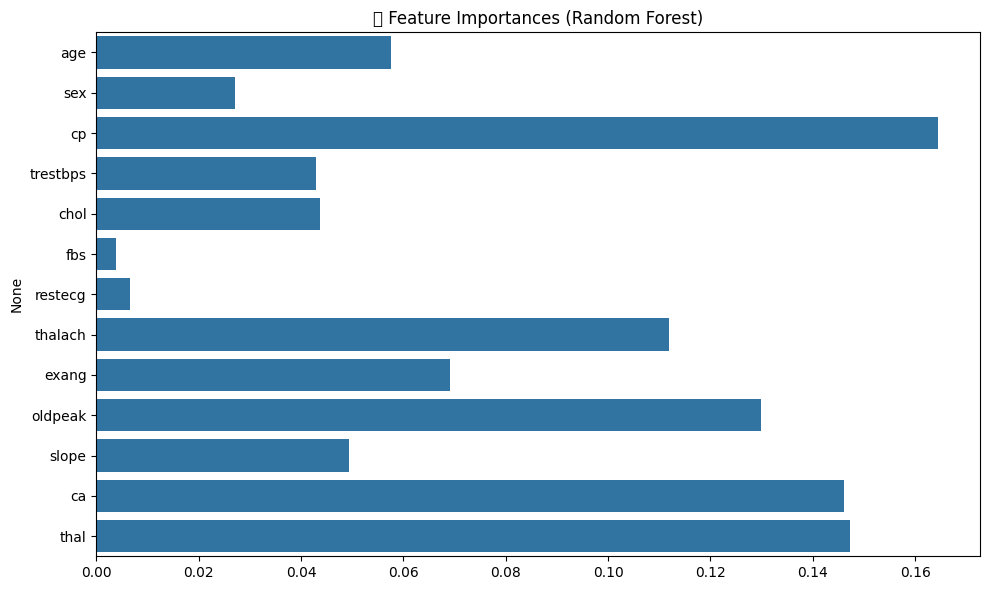

In [14]:
# ====================================================
# 🌟 6. Feature Importances from Random Forest
# ====================================================
import seaborn as sns

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("🌟 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [15]:
# ====================================================
# 🔁 7. Evaluate with Cross-Validation
# ====================================================
from sklearn.model_selection import cross_val_score

dtree_cv_scores = cross_val_score(dtree, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print(f"📈 Decision Tree CV Accuracy: {dtree_cv_scores.mean():.4f}")
print(f"📈 Random Forest CV Accuracy: {rf_cv_scores.mean():.4f}")


📈 Decision Tree CV Accuracy: 0.8302
📈 Random Forest CV Accuracy: 0.9298


In [16]:
print("\n📋 Final Summary:")
print(f"🌳 Decision Tree - Test Accuracy: {tree_acc:.4f} | CV Accuracy: {dtree_cv_scores.mean():.4f}")
print(f"🌲 Random Forest - Test Accuracy: {rf_acc:.4f} | CV Accuracy: {rf_cv_scores.mean():.4f}")



📋 Final Summary:
🌳 Decision Tree - Test Accuracy: 0.7805 | CV Accuracy: 0.8302
🌲 Random Forest - Test Accuracy: 0.8732 | CV Accuracy: 0.9298
